In [6]:
!pip install qiskit qiskit_aer matplotlib --quiet

# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))


def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc


def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()


if __name__ == "__main__":
    marked_state = "101"
    print("🔍 Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
🔍 Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


In [ ]:
!pip install qiskit qiskit_aer matplotlib pylatexenc --quiet
import os, sys
os.kill(os.getpid(), 9)   # 🔁 This restarts the runtime automatically



1️⃣ Task 1 — Try marked states: |001⟩, |111⟩, |010⟩

🔹 Grover for |001⟩
     ┌───┐┌───┐     ┌───┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤├───┤  │  ├───┤├───┤├───┤       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


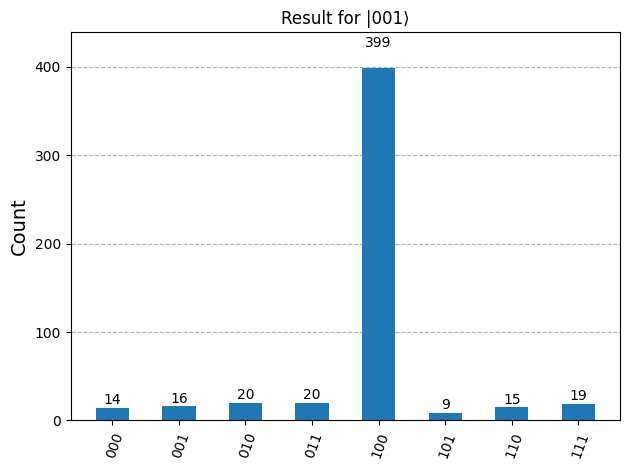


🔹 Grover for |111⟩
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


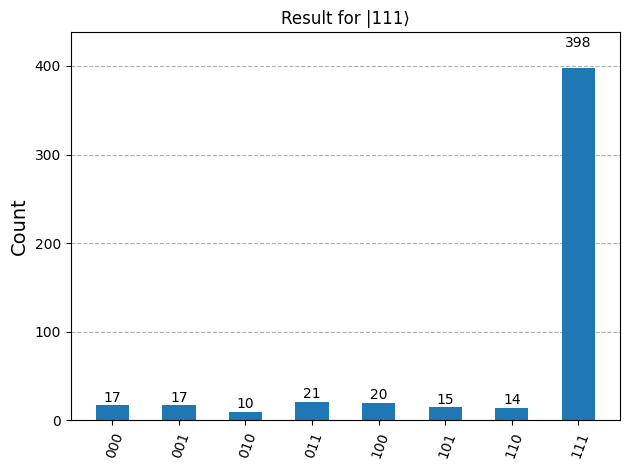


🔹 Grover for |010⟩
     ┌───┐┌───┐          ┌───┐┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤└───┘       │  ├───┤├───┤└───┘            │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/══════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                       0  1  2 


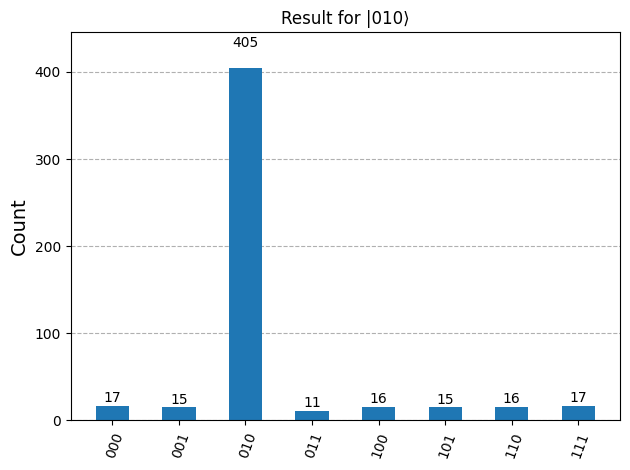


2️⃣ Task 2 — Extend to 4 Qubits, |1101⟩
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                             0  1  2  3 


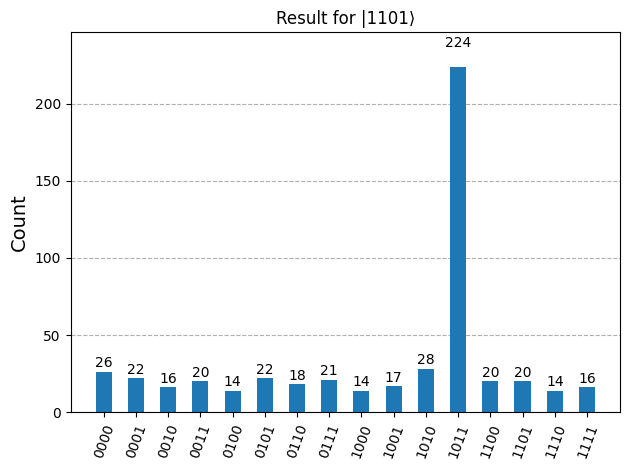


3️⃣ Task 3 — Run with 2 iterations for |111⟩
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐»
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├»
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤            │  ├───┤»
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├»
     ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤»
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«     ┌───┐               ┌───┐┌───┐     ┌─┐      
«q_0: ┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
«     ├───┤            │  ├───┤├───┤     └╥┘┌─┐   
«q_1: ┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├───
«     ├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
«q_2: 

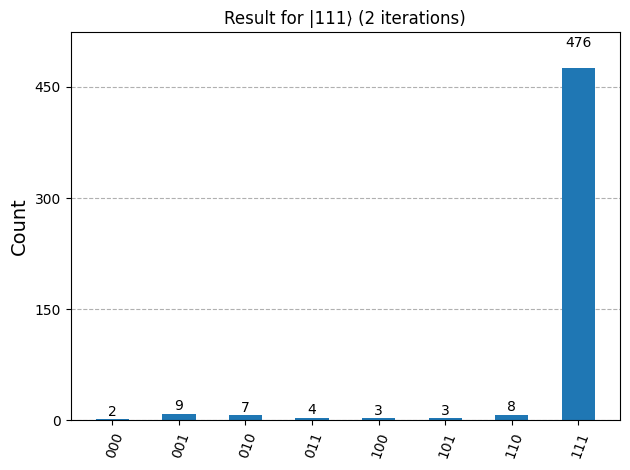


4️⃣ Task 4 — Circuit Visualization for |010⟩
     ┌───┐┌───┐          ┌───┐┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤└───┘       │  ├───┤├───┤└───┘            │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/══════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                       0  1  2 


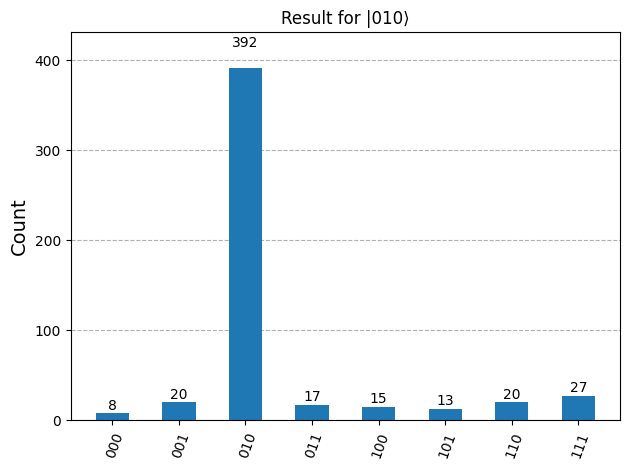


5️⃣ Task 5 — Ideal vs Noisy Comparison for |101⟩
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


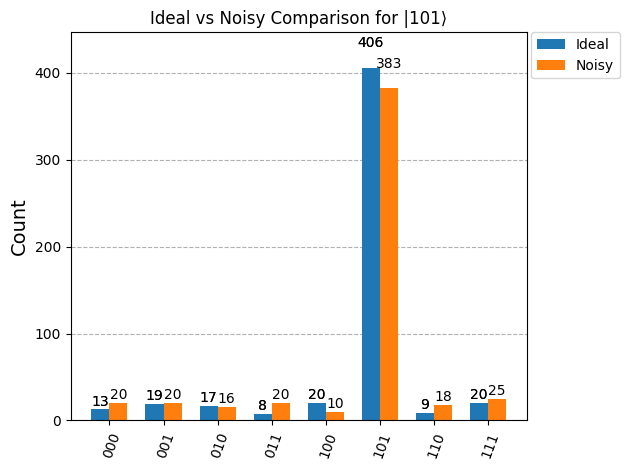


✅ All 5 student tasks executed successfully!

6️⃣ Task 6 — Run on IBM Quantum (optional, uncomment below)



'\nfrom qiskit_ibm_runtime import QiskitRuntimeService\nservice = QiskitRuntimeService(channel="ibm_quantum")\nbackend = service.backend("ibm_oslo")\njob = backend.run(qc5, shots=1024)\nplot_histogram(job.result().get_counts(), title="IBM Quantum Result")\nplt.show()\n'

In [12]:
!pip install qiskit qiskit_aer matplotlib --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error
import matplotlib.pyplot as plt
from IPython.display import Image

# Ensure plots show inline
%matplotlib inline

# --------------------------
# Oracle + Diffuser
# --------------------------
def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state, iterations=1):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

def run_simulation(qc, noisy=False):
    sim = AerSimulator()
    transpiled = transpile(qc, sim)
    if noisy:
        noise = NoiseModel()
        noise.add_all_qubit_quantum_error(depolarizing_error(0.03, 1), ['x','h'])
        noise.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ['cx'])
        result = sim.run(transpiled, shots=512, noise_model=noise).result()
    else:
        result = sim.run(transpiled, shots=512).result()
    return result.get_counts()

def show_hist(counts, title):
    fig = plot_histogram(counts, title=title)
    fig.savefig("hist.png", bbox_inches='tight')
    plt.close(fig)
    display(Image("hist.png"))

# =======================================================
# 🧩 STUDENT TASKS — Grover’s Algorithm
# =======================================================

# 1️⃣ Multiple marked states
print("\n1️⃣ Task 1 — Try marked states: |001⟩, |111⟩, |010⟩")
for state in ["001", "111", "010"]:
    print(f"\n🔹 Grover for |{state}⟩")
    qc = grover_search(state)
    print(qc.draw(output="text"))
    counts = run_simulation(qc)
    show_hist(counts, f"Result for |{state}⟩")

# 2️⃣ Extend to 4 qubits
print("\n2️⃣ Task 2 — Extend to 4 Qubits, |1101⟩")
qc2 = grover_search("1101")
print(qc2.draw(output="text"))
show_hist(run_simulation(qc2), "Result for |1101⟩")

# 3️⃣ Multiple iterations
print("\n3️⃣ Task 3 — Run with 2 iterations for |111⟩")
qc3 = grover_search("111", iterations=2)
print(qc3.draw(output="text"))
show_hist(run_simulation(qc3), "Result for |111⟩ (2 iterations)")

# 4️⃣ Visualize circuit
print("\n4️⃣ Task 4 — Circuit Visualization for |010⟩")
qc4 = grover_search("010")
print(qc4.draw(output="text"))
show_hist(run_simulation(qc4), "Result for |010⟩")

# 5️⃣ Ideal vs Noisy comparison
print("\n5️⃣ Task 5 — Ideal vs Noisy Comparison for |101⟩")
qc5 = grover_search("101")
print(qc5.draw(output="text"))
ideal = run_simulation(qc5, noisy=False)
noisy = run_simulation(qc5, noisy=True)
fig = plot_histogram([ideal, noisy],
                     legend=["Ideal", "Noisy"],
                     title="Ideal vs Noisy Comparison for |101⟩")
fig.savefig("compare.png", bbox_inches='tight')
plt.close(fig)
display(Image("compare.png"))

print("\n✅ All 5 student tasks executed successfully!")

# 6️⃣ Real hardware (optional)
print("\n6️⃣ Task 6 — Run on IBM Quantum (optional, uncomment below)\n")
"""
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.backend("ibm_oslo")
job = backend.run(qc5, shots=1024)
plot_histogram(job.result().get_counts(), title="IBM Quantum Result")
plt.show()
"""
